In [2]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Data_Frames/Introverts_Extroverts/train.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Data_Science/Data_Frames/Introverts_Extroverts/test.csv')

train_df = data1.copy()
test_df = data2.copy()

print("First 3 rows of training data: \n", train_df.head(3))
print("First 3 rows of test data: \n", test_df.head(3))

First 3 rows of training data: 
    id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
First 3 rows of test data: 
       id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0  18524               3.0         No                      7.0            4.0   
1  18525               NaN        Yes                      0.0            0.0   
2  18526               3.0         No                      5.0    

In [5]:
from sklearn.preprocessing import LabelEncoder

le_fear = LabelEncoder().fit(train_df['Stage_fear'])
le_drain = LabelEncoder().fit(train_df['Drained_after_socializing'])
le_personality = LabelEncoder().fit(train_df['Personality'])

train_df['Stage_fear'] = le_fear.transform(train_df['Stage_fear'])
train_df['Drained_after_socializing'] = le_drain.transform(train_df['Drained_after_socializing'])
train_df['Personality'] = le_personality.transform(train_df['Personality'])

test_df['Stage_fear'] = le_fear.transform(test_df['Stage_fear'])
test_df['Drained_after_socializing'] = le_drain.transform(test_df['Drained_after_socializing'])

In [6]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = train_df[train_df['Time_spent_Alone'].notna()]
train_missing = train_df[train_df['Time_spent_Alone'].isna()]

feature_cols = ['Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Time_spent_Alone']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

train_df.loc[X_missing.index, 'Time_spent_Alone'] = predicted_values

In [7]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = train_df[train_df['Social_event_attendance'].notna()]
train_missing = train_df[train_df['Social_event_attendance'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Social_event_attendance']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

train_df.loc[X_missing.index, 'Social_event_attendance'] = predicted_values

In [8]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = train_df[train_df['Going_outside'].notna()]
train_missing = train_df[train_df['Going_outside'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Going_outside']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

train_df.loc[X_missing.index, 'Going_outside'] = predicted_values

In [9]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = train_df[train_df['Friends_circle_size'].notna()]
train_missing = train_df[train_df['Friends_circle_size'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Friends_circle_size']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

train_df.loc[X_missing.index, 'Friends_circle_size'] = predicted_values

In [10]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = train_df[train_df['Post_frequency'].notna()]
train_missing = train_df[train_df['Post_frequency'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size']
X_train = train_known[feature_cols]
y_train = train_known['Post_frequency']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

train_df.loc[X_missing.index, 'Post_frequency'] = predicted_values

In [11]:
missing_features = ['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside', 'Friends_circle_size',
       'Post_frequency']

for col in missing_features:
    train_df[col] = train_df[col].fillna(train_df[col].mean())


In [12]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = test_df[test_df['Time_spent_Alone'].notna()]
train_missing = test_df[test_df['Time_spent_Alone'].isna()]

feature_cols = ['Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Time_spent_Alone']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

test_df.loc[X_missing.index, 'Time_spent_Alone'] = predicted_values

In [13]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = test_df[test_df['Social_event_attendance'].notna()]
train_missing = test_df[test_df['Social_event_attendance'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Social_event_attendance']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

test_df.loc[X_missing.index, 'Social_event_attendance'] = predicted_values

In [14]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = test_df[test_df['Going_outside'].notna()]
train_missing = test_df[test_df['Going_outside'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance',
                'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Going_outside']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

test_df.loc[X_missing.index, 'Going_outside'] = predicted_values

In [15]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = test_df[test_df['Friends_circle_size'].notna()]
train_missing = test_df[test_df['Friends_circle_size'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Post_frequency']
X_train = train_known[feature_cols]
y_train = train_known['Friends_circle_size']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

test_df.loc[X_missing.index, 'Friends_circle_size'] = predicted_values

In [16]:
from sklearn.ensemble import RandomForestRegressor

#splitting missing from not missing

train_known = test_df[test_df['Post_frequency'].notna()]
train_missing = test_df[test_df['Post_frequency'].isna()]

feature_cols = ['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside',
                'Drained_after_socializing', 'Friends_circle_size']
X_train = train_known[feature_cols]
y_train = train_known['Post_frequency']

# Drop rows with missing values in predictor columns
train_mask = X_train.notnull().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_missing = train_missing[feature_cols]
X_missing = X_missing[X_missing.notnull().all(axis=1)]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)

test_df.loc[X_missing.index, 'Post_frequency'] = predicted_values

In [17]:
missing_features = ['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside', 'Friends_circle_size',
       'Post_frequency']

for col in missing_features:
    test_df[col] = test_df[col].fillna(test_df[col].mean())


In [18]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='Personality')
y = train_df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state=42)

In [19]:
from imblearn.over_sampling import SMOTENC

cat_features_idx = [X_train.columns.get_loc(col) for col in ['Stage_fear', 'Drained_after_socializing']]

smote_nc = SMOTENC(categorical_features=cat_features_idx, random_state=42)

X_resampled, y_resampled = smote_nc.fit_resample(X_train.values, y_train.values)

In [20]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.Series(y_resampled, name='Personality')

train_df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis= 1)

In [21]:
#feature engineering

train_df_resampled['social_avoidance'] = train_df_resampled['Time_spent_Alone'] / (train_df_resampled['Social_event_attendance'] + 1)
test_df['social_avoidance'] = test_df['Time_spent_Alone'] / (test_df['Social_event_attendance'] + 1)

train_df_resampled['introversion_score'] = (train_df_resampled['Stage_fear'] * train_df_resampled['Drained_after_socializing']) / (train_df_resampled['Friends_circle_size'] + 1)
test_df['introversion_score'] = (test_df['Stage_fear'] * test_df['Drained_after_socializing']) / (test_df['Friends_circle_size'] + 1)

train_df_resampled['social_engagement'] = train_df_resampled['Social_event_attendance'] + train_df_resampled['Going_outside']
test_df['social_engagement'] = test_df['Social_event_attendance'] + test_df['Going_outside']

train_df_resampled['social_ratio'] = train_df_resampled['Time_spent_Alone'] / (train_df_resampled['Social_event_attendance'] + 1)
test_df['social_ratio'] = test_df['Time_spent_Alone'] / (test_df['Social_event_attendance'] + 1)

train_df_resampled['social_fear'] = train_df_resampled['Stage_fear'] + train_df_resampled['Time_spent_Alone']
test_df['social_fear'] = test_df['Stage_fear'] + test_df['Time_spent_Alone']

train_df_resampled['draining_score'] = train_df_resampled['Drained_after_socializing'] * train_df_resampled['Time_spent_Alone']
test_df['draining_score'] = test_df['Drained_after_socializing'] * test_df['Time_spent_Alone']

train_df_resampled['drain_x_low_social'] = train_df_resampled['Drained_after_socializing'] * (1 - train_df_resampled['Social_event_attendance'])
test_df['drain_x_low_social'] = test_df['Drained_after_socializing'] * (1 - test_df['Social_event_attendance'])

train_df_resampled['alone_score'] = (train_df_resampled['Time_spent_Alone'] * train_df_resampled['Drained_after_socializing']) / (train_df_resampled['Friends_circle_size'] + 1)
test_df['alone_score'] = (test_df['Time_spent_Alone'] * test_df['Drained_after_socializing']) / (test_df['Friends_circle_size'] + 1)

train_df_resampled['going_out_score'] = train_df_resampled['Going_outside'] / (train_df_resampled['Friends_circle_size'] + 1)
test_df['going_out_score'] = test_df['Going_outside'] / (test_df['Friends_circle_size'] + 1)

train_df_resampled['judjement_fear'] = train_df_resampled['Post_frequency'] * train_df_resampled['Stage_fear']
test_df['judjement_fear'] = test_df['Post_frequency'] * test_df['Stage_fear']


In [22]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.3 MB/s eta 0:00:00


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [24]:
from sklearn.model_selection import train_test_split

X = train_df_resampled.drop(columns='Personality')
y = train_df_resampled['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [25]:
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [26]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""

    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': "cuda"
    }

    model = XGBClassifier(**params)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_log_loss')

    return np.median(cv_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best CV score:", study.best_value)

[I 2025-07-04 13:01:29,402] A new study created in memory with name: no-name-6f14c224-d66a-4da2-b78f-2acd5819f63b
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:30] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:30] WARNING: /workspace/src/learner.c

Best parameters: {'n_estimators': 460, 'max_depth': 6, 'learning_rate': 0.02097628806142212, 'subsample': 0.8116617261009851, 'colsample_bytree': 0.6031097490824783, 'min_child_weight': 1, 'gamma': 1.0220938025132635, 'reg_alpha': 0.5605761124428708, 'reg_lambda': 0.21299279341897326}
Best CV score: -0.09403959476386671


In [27]:
study.best_params

{'n_estimators': 460,
 'max_depth': 6,
 'learning_rate': 0.02097628806142212,
 'subsample': 0.8116617261009851,
 'colsample_bytree': 0.6031097490824783,
 'min_child_weight': 1,
 'gamma': 1.0220938025132635,
 'reg_alpha': 0.5605761124428708,
 'reg_lambda': 0.21299279341897326}

In [28]:
params = {'n_estimators': 231,
 'max_depth': 5,
 'learning_rate': 0.04218044409404582,
 'subsample': 0.9203930800306594,
 'colsample_bytree': 0.7081637564243219,
 'min_child_weight': 7,
 'gamma': 0.9595184204709895,
 'reg_alpha': 0.48125424720946186,
 'reg_lambda': 1.099776473950305}

best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_train, y_train)

Final CV scores: [-0.09153219 -0.10203594 -0.09450126]
Mean CV score: -0.0960 ± 0.0044


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7081637564243219, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.9595184204709895,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04218044409404582,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=231, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
# X_submission = test_df.copy()

# y_pred_enc = best_model.predict(X_submission)

# y_pred = le_personality.inverse_transform(y_pred_enc)

# submission_df = pd.DataFrame({
#     'id' : test_df['id'],
#     'Personality' : y_pred
# })

# submission_df.to_csv("submission6.csv", index= False)

# print("Success!")

Success!


In [30]:
!pip install SHAP

In [31]:
import shap

# Initializing SHAP
explainer = shap.Explainer(best_model)

# Computing SHAP values for the test set
shap_values = explainer(X_test)


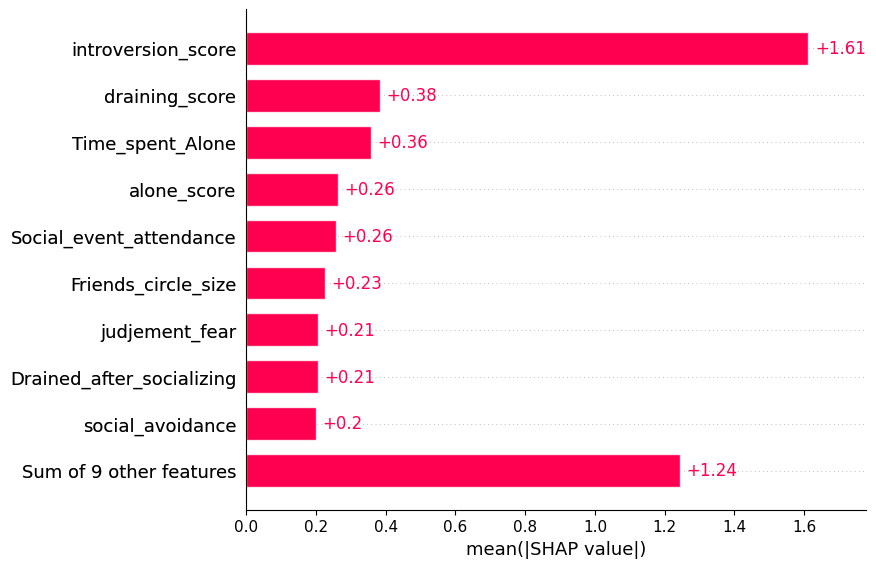

In [32]:
#visualizing features impact

shap.plots.bar(shap_values)

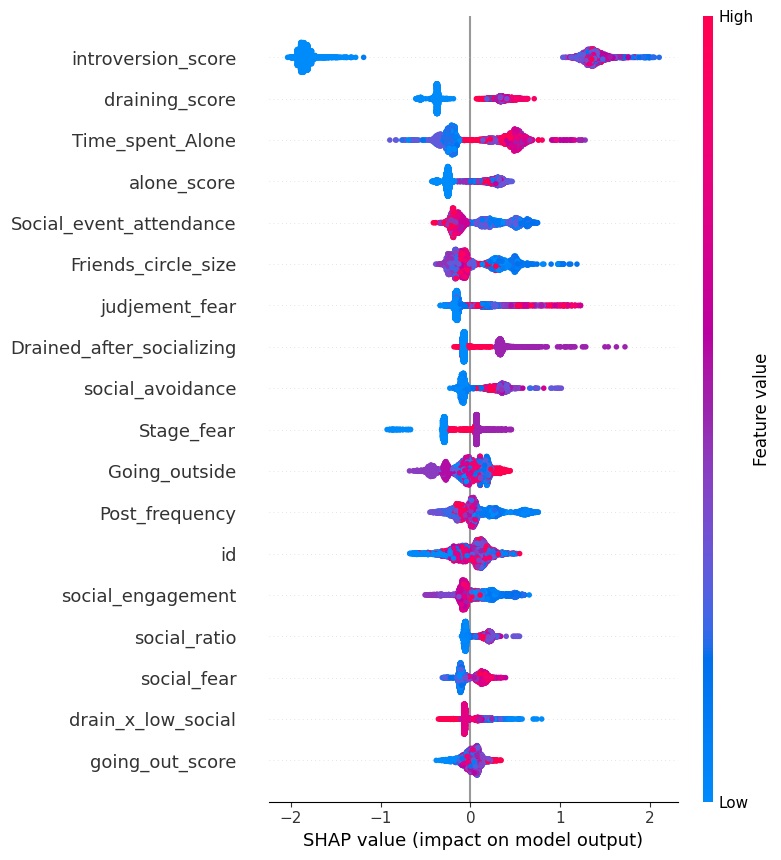

In [33]:
shap.summary_plot(shap_values, X_test)

In [34]:
#further feature engineering

train_df_resampled['social_score'] = train_df_resampled['Social_event_attendance'] * train_df_resampled['Time_spent_Alone']
test_df['social_score'] = test_df['Social_event_attendance'] * test_df['Time_spent_Alone']

train_df_resampled['judjement_social_fear'] = train_df_resampled['Social_event_attendance'] * train_df_resampled['Stage_fear']
test_df['judjement_social_fear'] = test_df['Social_event_attendance'] * test_df['Stage_fear']

train_df_resampled['drain_stage_fear'] = train_df_resampled['Drained_after_socializing'] * train_df_resampled['Stage_fear']
test_df['drain_stage_fear'] = test_df['Drained_after_socializing'] * test_df['Stage_fear']

In [35]:
from sklearn.model_selection import train_test_split

X = train_df_resampled.drop(columns='Personality')
y = train_df_resampled['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [36]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""

    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': "cuda"
    }

    model = XGBClassifier(**params)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_log_loss')

    return np.median(cv_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best CV score:", study.best_value)

[I 2025-07-04 13:03:37,688] A new study created in memory with name: no-name-45b75689-e77d-4322-a6ae-f6cc1a4b259c
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-04 13:03:39,903] Trial 0 finished with value: -0.09462551683656281 and parameters: {'n_estimators': 101, 'max_depth': 4, 'learning_rate': 0.09488997648850665, 'subsample': 0.629011935422392, 'colsample_bytree': 0.7936059222231794, 'min_chi

Best parameters: {'n_estimators': 101, 'max_depth': 4, 'learning_rate': 0.09488997648850665, 'subsample': 0.629011935422392, 'colsample_bytree': 0.7936059222231794, 'min_child_weight': 4, 'gamma': 0.6307315006129706, 'reg_alpha': 0.31076263118605785, 'reg_lambda': 1.508805293400433}
Best CV score: -0.09462551683656281


In [37]:
study.best_params

{'n_estimators': 101,
 'max_depth': 4,
 'learning_rate': 0.09488997648850665,
 'subsample': 0.629011935422392,
 'colsample_bytree': 0.7936059222231794,
 'min_child_weight': 4,
 'gamma': 0.6307315006129706,
 'reg_alpha': 0.31076263118605785,
 'reg_lambda': 1.508805293400433}

In [38]:
params = {'n_estimators': 476,
 'max_depth': 7,
 'learning_rate': 0.06266747830667886,
 'subsample': 0.9404387823729805,
 'colsample_bytree': 0.7241378393301607,
 'min_child_weight': 8,
 'gamma': 0.8825015070214715,
 'reg_alpha': 0.659213470753659,
 'reg_lambda': 0.3045856951420487}

best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_train, y_train)

Final CV scores: [-0.09308553 -0.10323918 -0.09602464]
Mean CV score: -0.0974 ± 0.0043


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7241378393301607, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.8825015070214715,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06266747830667886,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=476, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
# X_submission = test_df.copy()

# y_pred_enc = best_model.predict(X_submission)

# y_pred = le_personality.inverse_transform(y_pred_enc)

# submission_df = pd.DataFrame({
#     'id' : test_df['id'],
#     'Personality' : y_pred
# })

# submission_df.to_csv("submission7.csv", index= False)

# print("Success!")

Success!


In [40]:
import shap

# Initializing SHAP
explainer = shap.Explainer(best_model)

# Computing SHAP values for the test set
shap_values = explainer(X_test)

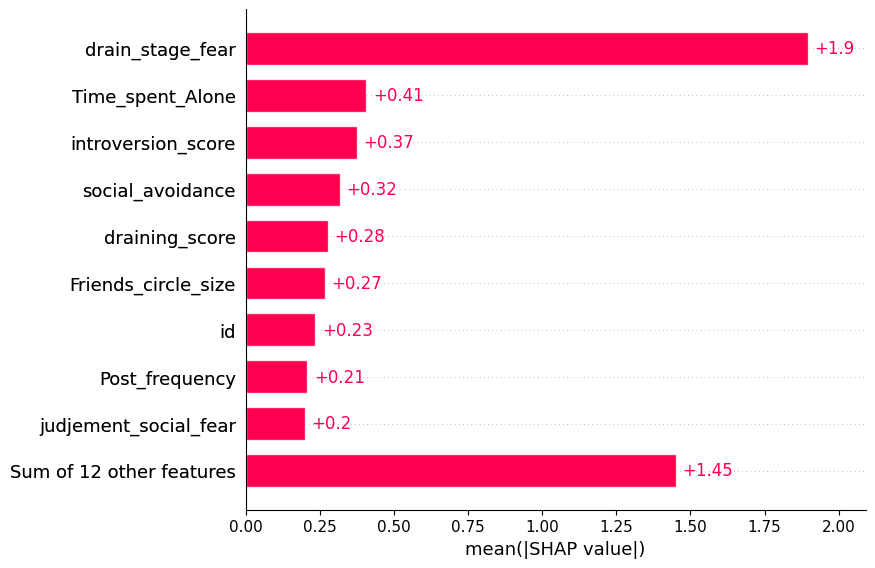

In [41]:
#visualizing features impact

shap.plots.bar(shap_values)

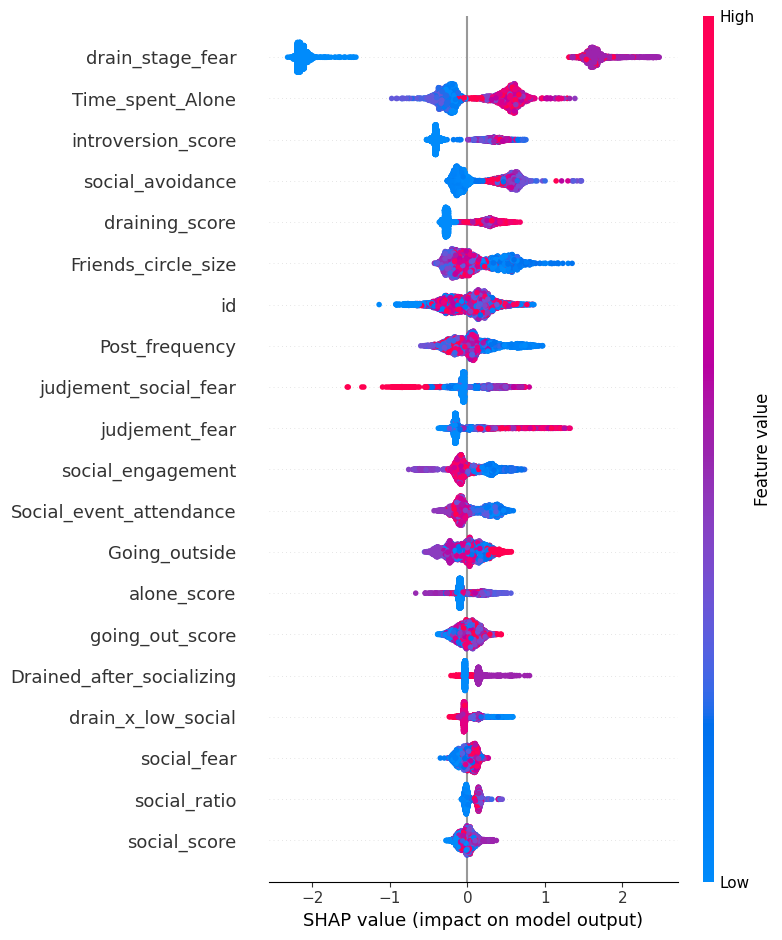

In [42]:
shap.summary_plot(shap_values, X_test)

In [44]:
train_df_resampled.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality', 'social_avoidance',
       'introversion_score', 'social_engagement', 'social_ratio',
       'social_fear', 'draining_score', 'drain_x_low_social', 'alone_score',
       'going_out_score', 'judjement_fear', 'social_score',
       'judjement_social_fear', 'drain_stage_fear'],
      dtype='object')

In [45]:
low_impact_features = ['social_score', 'social_ratio', 'drain_x_low_social', 'social_fear', 'Drained_after_socializing', 'going_out_score', 'alone_score', 'Going_outside', 'going_out_score', 'Social_event_attendance', 'social_engagement', 'judjement_fear' ]

In [46]:
from sklearn.model_selection import train_test_split

# Dropping low-impact features from X
X = train_df_resampled.drop(columns=['Personality'] + low_impact_features)
y = train_df_resampled['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
test_df = test_df.drop(columns= low_impact_features)

In [48]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""

    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': "cuda"
    }

    model = XGBClassifier(**params)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_log_loss')

    return np.median(cv_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best CV score:", study.best_value)

[I 2025-07-04 13:16:39,459] A new study created in memory with name: no-name-87327413-9847-4c62-a4b1-339b1475562f
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-04 13:16:46,357] Trial 0 finished with value: -0.09808601984156054 and parameters: {'n_estimators': 455, 'max_depth': 8, 'learning_rate': 0.09419490504547005, 'subsample': 0.6959580132737669, 'colsample_bytree': 0.7762135293026883, 'min_ch

Best parameters: {'n_estimators': 497, 'max_depth': 5, 'learning_rate': 0.05894753006978353, 'subsample': 0.9909719537797292, 'colsample_bytree': 0.6235856644854911, 'min_child_weight': 2, 'gamma': 0.32244839935510416, 'reg_alpha': 1.1842584215002459, 'reg_lambda': 0.41605608786364967}
Best CV score: -0.09471532062587013


In [49]:
 study.best_params

{'n_estimators': 497,
 'max_depth': 5,
 'learning_rate': 0.05894753006978353,
 'subsample': 0.9909719537797292,
 'colsample_bytree': 0.6235856644854911,
 'min_child_weight': 2,
 'gamma': 0.32244839935510416,
 'reg_alpha': 1.1842584215002459,
 'reg_lambda': 0.41605608786364967}

In [50]:
params = {'n_estimators': 497,
 'max_depth': 5,
 'learning_rate': 0.05894753006978353,
 'subsample': 0.9909719537797292,
 'colsample_bytree': 0.6235856644854911,
 'min_child_weight': 2,
 'gamma': 0.32244839935510416,
 'reg_alpha': 1.1842584215002459,
 'reg_lambda': 0.41605608786364967}

best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_train, y_train)

Final CV scores: [-0.09141339 -0.10244487 -0.09520981]
Mean CV score: -0.0964 ± 0.0046


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6235856644854911, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.32244839935510416,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05894753006978353,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=497, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
# X_submission = test_df.copy()

# y_pred_enc = best_model.predict(X_submission)

# y_pred = le_personality.inverse_transform(y_pred_enc)

# submission_df = pd.DataFrame({
#     'id' : test_df['id'],
#     'Personality' : y_pred
# })

# submission_df.to_csv("submission8.csv", index= False)

# print("Success!")

Success!


In [52]:
import shap

# Initializing SHAP
explainer = shap.Explainer(best_model)

# Computing SHAP values for the test set
shap_values = explainer(X_test)

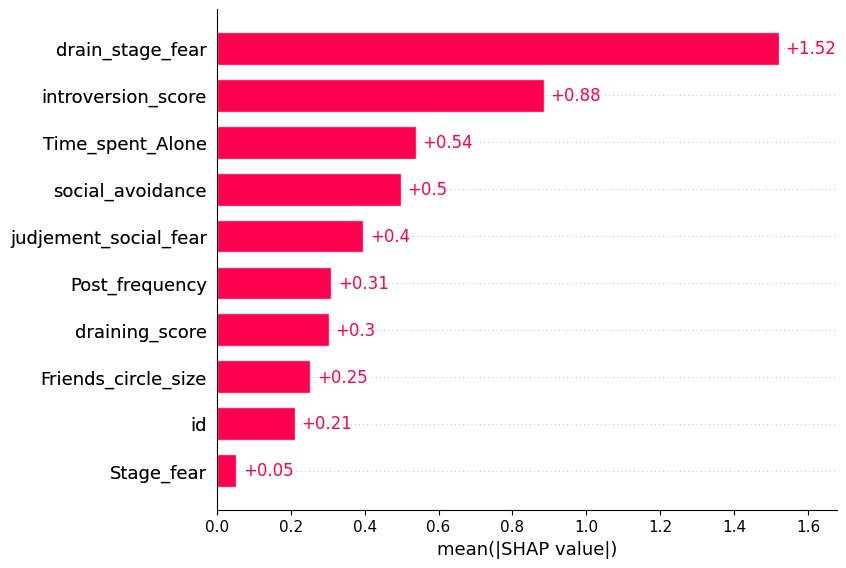

In [53]:
#visualizing features impact

shap.plots.bar(shap_values)

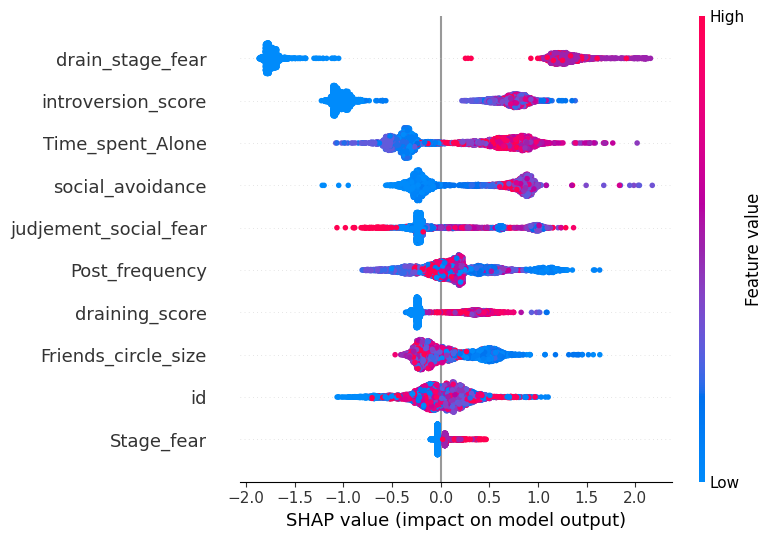

In [54]:
shap.summary_plot(shap_values, X_test)